In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import VGG16, ResNet50
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import cifar10
from sklearn.metrics import precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import classification_report

In [ ]:
# Load the CIFAR-10 dataset (60,000 32x32 color images in 10 classes)
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Normalize pixel values between 0 and 1
x_train, x_test = x_train / 255.0, x_test / 255.0

# Print shape of training and test sets
print("Training data shape:", x_train.shape)
print("Test data shape:", x_test.shape)


170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 18s 0us/step
Training data shape: (50000, 32, 32, 3)
Test data shape: (10000, 32, 32, 3)


In [ ]:
# Function to plot an image
def plot_image(image, title):
    plt.imshow(image)
    plt.title(title)
    plt.axis('off')

In [ ]:
# Select a sample image to show preprocessing effects
sample_image = x_train[0]
sample_image

array([[[0.23137255, 0.24313725, 0.24705882],
        [0.16862745, 0.18039216, 0.17647059],
        [0.19607843, 0.18823529, 0.16862745],
        ...,
        [0.61960784, 0.51764706, 0.42352941],
        [0.59607843, 0.49019608, 0.4       ],
        [0.58039216, 0.48627451, 0.40392157]],

       [[0.0627451 , 0.07843137, 0.07843137],
        [0.        , 0.        , 0.        ],
        [0.07058824, 0.03137255, 0.        ],
        ...,
        [0.48235294, 0.34509804, 0.21568627],
        [0.46666667, 0.3254902 , 0.19607843],
        [0.47843137, 0.34117647, 0.22352941]],

       [[0.09803922, 0.09411765, 0.08235294],
        [0.0627451 , 0.02745098, 0.        ],
        [0.19215686, 0.10588235, 0.03137255],
        ...,
        [0.4627451 , 0.32941176, 0.19607843],
        [0.47058824, 0.32941176, 0.19607843],
        [0.42745098, 0.28627451, 0.16470588]],

       ...,

       [[0.81568627, 0.66666667, 0.37647059],
        [0.78823529, 0.6       , 0.13333333],
        [0.77647059, 0

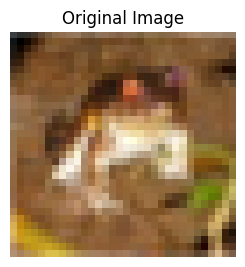

In [ ]:
# Show the original image
plt.subplot(1, 2, 1)
plot_image(sample_image, "Original Image")

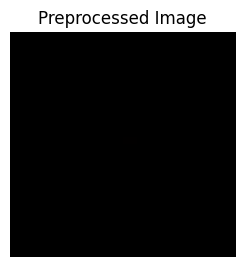

In [ ]:
# Select a sample image to show preprocessing effects
sample_image = x_train[0]

# Apply preprocessing (normalization)
processed_image = sample_image / 255.0

# Show preprocessed image
plt.subplot(1, 2, 2)
plot_image(processed_image, "Preprocessed Image")
plt.show()

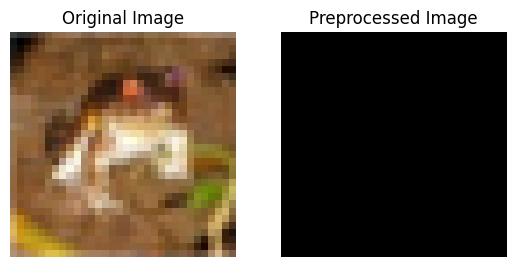

In [ ]:
# Function to plot an image
def plot_image(image, title):
    plt.imshow(image)
    plt.title(title)
    plt.axis('off')

# Select a sample image to show preprocessing effects
sample_image = x_train[0]

# Show the original image
plt.subplot(1, 2, 1)
plot_image(sample_image, "Original Image")

# Apply preprocessing (normalization)
processed_image = sample_image / 255.0

# Show preprocessed image
plt.subplot(1, 2, 2)
plot_image(processed_image, "Preprocessed Image")
plt.show()

In [ ]:
# Define a simple model with a Dropout layer
def build_simple_model_with_dropout():
    model = models.Sequential()

    # First Convolutional layer
    model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
    model.add(layers.MaxPooling2D((2, 2)))

    # Second Convolutional layer
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))

    # Dropout Layer
    model.add(layers.Dropout(0.5))  # Randomly drops 50% of neurons to prevent overfitting

    # Fully Connected layer
    model.add(layers.Flatten())
    model.add(layers.Dense(64, activation='relu'))

    # Output Layer (10 classes for CIFAR-10)
    model.add(layers.Dense(10, activation='softmax'))

    return model


# Build and compile the model
model_with_dropout = build_simple_model_with_dropout()
model_with_dropout.compile(optimizer='adam',
                           loss='sparse_categorical_crossentropy',
                           metrics=['accuracy'])

# Print model summary
model_with_dropout.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 30, 30, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 13, 13, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 2304)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │         147,520 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 167,562 (654.54 KB)

 Trainable params: 167,562 (654.54 KB)

 Non-trainable params: 0 (0.00 B)

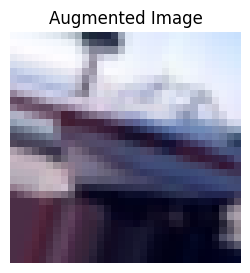

In [ ]:
# Define an ImageDataGenerator with data augmentation
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rotation_range=20,  # Rotate the image up to 20 degrees
    width_shift_range=0.2,  # Horizontally shift the image up to 20% of width
    height_shift_range=0.2,  # Vertically shift the image up to 20% of height
    horizontal_flip=True,  # Randomly flip the image horizontally
)

# Apply data augmentation to the training data
datagen.fit(x_train)

# Show some augmented images
for X_batch, _ in datagen.flow(x_train, y_train, batch_size=1):
    plt.figure(figsize=(3,3))
    plot_image(X_batch[0], "Augmented Image")
    plt.show()
    break  # Stop after displaying one batch


In [ ]:
# Load pre-trained VGG-16 and ResNet-50 models without their top layers
vgg_model = VGG16(weights='imagenet', include_top=False, input_shape=(32, 32, 3))
resnet_model = ResNet50(weights='imagenet', include_top=False, input_shape=(32, 32, 3))

# Define a function to add a custom classification layer on top of these models
def add_custom_classification_head(base_model):
    model = models.Sequential()
    model.add(base_model)  # Add the pre-trained base model (without top layers)

    # Add a global spatial average pooling layer
    model.add(layers.GlobalAveragePooling2D())

    # Add a fully connected layer with 64 neurons
    model.add(layers.Dense(64, activation='relu'))

    # Add a softmax layer for the final classification (10 classes)
    model.add(layers.Dense(10, activation='softmax'))

    return model

# Create VGG-16 and ResNet-50 models with custom classification heads
vgg_model_with_head = add_custom_classification_head(vgg_model)
resnet_model_with_head = add_custom_classification_head(resnet_model)

# Compile the models
vgg_model_with_head.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
resnet_model_with_head.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step
94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 6s 0us/step


In [ ]:
# Train VGG-16 model for 3 epochs
history_vgg = vgg_model_with_head.fit(x_train, y_train, epochs=3, validation_data=(x_test, y_test))

# Train ResNet-50 model for 3 epochs
history_resnet = resnet_model_with_head.fit(x_train, y_train, epochs=3, validation_data=(x_test, y_test))

Epoch 1/3
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 72s 39ms/step - accuracy: 0.2148 - loss: 2.0159 - val_accuracy: 0.4278 - val_loss: 1.4611
Epoch 2/3
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 69s 35ms/step - accuracy: 0.4804 - loss: 1.3470 - val_accuracy: 0.6190 - val_loss: 1.0965
Epoch 3/3
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 54s 35ms/step - accuracy: 0.6198 - loss: 1.0690 - val_accuracy: 0.6417 - val_loss: 1.0330
Epoch 1/3
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 128s 48ms/step - accuracy: 0.4340 - loss: 1.6576 - val_accuracy: 0.6247 - val_loss: 1.0968
Epoch 2/3
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 47s 30ms/step - accuracy: 0.5661 - loss: 1.2422 - val_accuracy: 0.1853 - val_loss: 2.9374
Epoch 3/3
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 82s 30ms/step - accuracy: 0.5752 - loss: 1.2147 - val_accuracy: 0.3745 - val_loss: 2.2339


In [ ]:
# Evaluate VGG-16 model
vgg_test_loss, vgg_test_acc = vgg_model_with_head.evaluate(x_test, y_test)
print(f"VGG-16 Test Accuracy: {vgg_test_acc:.2f}")

# Evaluate ResNet-50 model
resnet_test_loss, resnet_test_acc = resnet_model_with_head.evaluate(x_test, y_test)
print(f"ResNet-50 Test Accuracy: {resnet_test_acc:.2f}")


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.6698 - loss: 0.9421
VGG-16 Test Accuracy: 0.67
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.3949 - loss: 2.2966
ResNet-50 Test Accuracy: 0.40


In [ ]:
# Make predictions on the test set with the VGG-16 model
y_pred_vgg = vgg_model_with_head.predict(x_test)
y_pred_vgg_classes = np.argmax(y_pred_vgg, axis=1)

# Calculate Precision, Recall, and F1-Score for VGG-16
precision_vgg = precision_score(y_test, y_pred_vgg_classes, average='macro')
recall_vgg = recall_score(y_test, y_pred_vgg_classes, average='macro')
f1_vgg = f1_score(y_test, y_pred_vgg_classes, average='macro')

print(f"VGG-16 Precision: {precision_vgg:.2f}, Recall: {recall_vgg:.2f}, F1-Score: {f1_vgg:.2f}")

# Make predictions on the test set with the ResNet-50 model
y_pred_resnet = resnet_model_with_head.predict(x_test)
y_pred_resnet_classes = np.argmax(y_pred_resnet, axis=1)

# Calculate Precision, Recall, and F1-Score for ResNet-50
precision_resnet = precision_score(y_test, y_pred_resnet_classes, average='macro')
recall_resnet = recall_score(y_test, y_pred_resnet_classes, average='macro')
f1_resnet = f1_score(y_test, y_pred_resnet_classes, average='macro')

print(f"ResNet-50 Precision: {precision_resnet:.2f}, Recall: {recall_resnet:.2f}, F1-Score: {f1_resnet:.2f}")


313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step
VGG-16 Precision: 0.69, Recall: 0.67, F1-Score: 0.67
313/313 ━━━━━━━━━━━━━━━━━━━━ 14s 33ms/step
ResNet-50 Precision: 0.53, Recall: 0.40, F1-Score: 0.40
